<a href="https://colab.research.google.com/github/CemOguz/mental-health-in-tech/blob/main/Cem's_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **1. INTRODUCTION** -TEST 1
The growth of the Mental related disorders has been on a high alert among the tech related workforce in the world. Therefore, in our case we are going to have a look at the analysis of mental related disorders. As a company data-scientist expert we are going to have a look at the correlation and the impact of health-related disorders among the work force. We are going to create a correlation between the tech-related workforce with the other workforce in the workplace. Our main aim and objective are to comprehend the magnitude of the several mental health related issues. In our analysis we are also going to have a look at the common areas which are usually affected in the workspace. To perform our analysis, we used the OSMI Mental Health in Tech survey which was done in 2016. This is an open-source dataset. The dataset was published by Open-Sourcing Mental illness. The organization is a non-profit corporation which was dedicated towards raising awareness, providing resources, and educating the masses on the importance of mental wellness.
Overview of the Dataset.
In our analysis we are also going to have a look at the common areas which are usually affected in the workspace. To perform our analysis, we used the OSMI Mental Health in Tech survey which was done in 2016. This is an open-source dataset. The dataset was published by Open-Sourcing Mental illness. The organization is a non-profit corporation which was dedicated towards raising awareness, providing resources, and educating the masses on the importance of mental wellness.  The dataset has survey responses which has over 1400 responses. Using this dataset comes with its own limitations and this includes not providing tangible evidence on the sample population which is a fair representation of the whole tech industry. The other limitations are seen on the responses which makes the analysis be constrained by use of a particular survey questions. This has adequate responses with limited responses.



Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style="darkgrid")
sns.set_palette(palette = 'pastel')
from sklearn.impute import SimpleImputer
cmap = sns.diverging_palette(220, 10, as_cmap=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
import matplotlib as mpl
sns.set_style('whitegrid')
sns.set_palette('Set2')
mpl.rcParams['font.size'] = 16
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.simplefilter(action='ignore')


## **Load the Required Data**

In [2]:
Survey_Data = pd.read_csv('/content/mental-heath-in-tech-2016_20161114.csv')
Survey_Data.info() # The information about number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
Survey_Data.head() # Returning first 5 rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

## **2. DATA PROCESSING & CLEANING**

In [3]:
columns_new = [
    'self_employed', 'No_employees', 'tech_company', 'tech_role', 'Mental_Health_Benefits', 'Mental_Health_Coverage_Options',
    'Mental_Health_Discusion_Employer','Mental_Health_Resource_Learning', 'Mental_Health_anonimity',
    'Mental_Health_Sick_Leave', 'Mental_Health_impact_discussion', 'Physical_Health_neg_impact', 'Mental_Health_coworkers_Negotiation',
    'Mental_Health_supervisor_Discussion', 'MH_VS_PH_employer', 'MH_consequence_coworkers',
    'Coverage_MH', 'MH_online_resources', 'MH_diagnosed&reveal_clients', 'MH_diagnosed&reveal_impact',
    'MH_diagnosed&reveal_coworkers', 'MH_coworkers_reveal_neg_impact', 'MH_productivity_impact', 'MH_productivity_impact_percentage',
    'prev_employers', 'Benefits_of_MH_prev_employers', 'prev_employers_MH_benefits_awareness','prev_employers_MH_discussion',
    'prev_employers_MH_resources', 'prev_employers_MH_anonimity','prev_employers_MH_discuss_neg_consequences',
    'prev_employers_PH_discuss_neg_consequences', 'prev_employers_MH_discussion_cowork','prev_employers_MH_discussion_supervisor',
    'prev_employers_MH_importance_employer', 'prev_employers_MH_consequences_coworkers',
    'future_employers_PH_specification', 'why/why_not', 'future_employers_MH_specification', 'why/why_not2',
    'MH_hurt_on_career', 'MH_neg_view_coworkers', 'MH_sharing_friends/fam_flag', 'MH_bad_response_workplace',
    'MH_for_others_bad_response_workplace', 'MH_family_history', 'MH_disorder_past', 'MH_disorder_current',
    'yes_what_diag', 'maybe_whats_your_diag', 'MH_diag_professional', 'yes_condition_diag', 'MH_sought_professional_treatment',
    'MH_effective_treat_impact_on_work', 'MH_not_effective_treat_impact_on_work',
    'Age', 'Gender', 'Country_live', 'Live_US_teritory', 'Country_work', 'Work_us_teritory','Work_position',
    'Remote'
]

In [4]:
Survey_Data.columns = columns_new

Cleaning the Age Column

In [5]:
Survey_Data['Age'].unique()

array([ 39,  29,  38,  43,  42,  30,  37,  44,  28,  34,  35,  52,  32,
        25,  31,  26,  33,  27,  36,  40,  46,  41,  45,  19,  21,  24,
        17,  23,  22,  51,  48,  55,  50,  49,  20,  54,  47,  56,  57,
        63,  99,  61, 323,  62,  53,  58,   3,  66,  59,  15,  65,  74,
        70])

In [6]:
#Removing extreme values from the Age Column
def remove_outliers(Survey_Data):
    Survey_Data["Age"] = Survey_Data["Age"].clip(10, 100)
    return Survey_Data

Survey_Data = remove_outliers(Survey_Data.copy())

Removing Unwanted Columns

In [7]:
Survey_Data = Survey_Data.drop(['self_employed', 'MH_VS_PH_employer', 'MH_consequence_coworkers', 'MH_online_resources', 'MH_diagnosed&reveal_clients', 'MH_diagnosed&reveal_impact',
    'MH_diagnosed&reveal_coworkers', 'MH_coworkers_reveal_neg_impact', 'MH_productivity_impact', 'MH_productivity_impact_percentage',
    'prev_employers', 'Benefits_of_MH_prev_employers', 'prev_employers_MH_benefits_awareness','prev_employers_MH_discussion',
    'prev_employers_MH_resources', 'prev_employers_MH_anonimity','prev_employers_MH_discuss_neg_consequences',
    'prev_employers_PH_discuss_neg_consequences', 'prev_employers_MH_discussion_cowork','prev_employers_MH_discussion_supervisor',
    'prev_employers_MH_importance_employer', 'prev_employers_MH_consequences_coworkers',
    'future_employers_PH_specification', 'why/why_not', 'future_employers_MH_specification', 'why/why_not2',
    'MH_hurt_on_career', 'MH_neg_view_coworkers', 'MH_sharing_friends/fam_flag', 'MH_bad_response_workplace',
    'MH_for_others_bad_response_workplace', 'MH_family_history', 'MH_disorder_past',
    'yes_what_diag', 'maybe_whats_your_diag', 'MH_diag_professional', 'yes_condition_diag', 'MH_sought_professional_treatment',
    'MH_effective_treat_impact_on_work', 'Physical_Health_neg_impact','MH_not_effective_treat_impact_on_work', 'Live_US_teritory', 'Country_work', 'Work_us_teritory','Work_position',
    'Remote'], axis = 1)

Analysis of the Null Values

In [8]:
if Survey_Data.isnull().sum().sum() == 0 :
    print ('There is no missing Survey_Data in our Survey_Dataset')
else:
    print('There is {} missing Survey_Data in our Survey_Dataset '.format(Survey_Data.isnull().sum().sum()))

There is 5609 missing Survey_Data in our Survey_Dataset 


From the above we can see that we do have about 5609 of missing values from the remaining columns that we are going to clean.

In [9]:
frame = pd.concat([Survey_Data.isnull().sum(), Survey_Data.nunique(), Survey_Data.dtypes], axis = 1, sort= False)
frame

,0,1,2
No_employees,287,6,object
tech_company,287,2,float64
tech_role,1170,2,float64
Mental_Health_Benefits,287,4,object
Mental_Health_Coverage_Options,420,3,object
Mental_Health_Discusion_Employer,287,3,object
Mental_Health_Resource_Learning,287,3,object
Mental_Health_anonimity,287,3,object
Mental_Health_Sick_Leave,287,6,object
Mental_Health_impact_discussion,287,3,object


Cleaning and analysis of the Gender Column


1.   First we are going to ensure that the data that we are having is having a consistent data of gender.



In [10]:
# Fix Gender data to be consistent
gender_mapping = {
    "male": "Male",
    "m": "Male",
    "M": "Male",
    "f": "Female",
    "F": "Female",
    "female": "Female",
}

Survey_Data["Gender"] = Survey_Data["Gender"].replace(gender_mapping)

# Get the counts of each gender
Gender_counts = Survey_Data["Gender"].value_counts()

# Find the genders with less than 20 counts
replace_Genders = list(Gender_counts[Gender_counts < 20].index)

# Replace these genders with "Other"
for Gender in replace_Genders:
    Survey_Data["Gender"] = Survey_Data["Gender"].replace(Gender, "Other")




In [11]:
Gender_counts = Survey_Data['Gender'].value_counts()
Gender_counts

Male      1024
Female     309
Other       97
Name: Gender, dtype: int64

In [12]:
gender_is_null = Survey_Data["Gender"].isnull()
number_of_missing_gender_values = gender_is_null.sum()

to_replace = ["NaN"]
value = "Male"

Survey_Data["Gender"].replace(to_replace=to_replace, value=value, inplace=True)

Cleaning of the Country Column

In [13]:
# Get the counts of each country
country_counts = Survey_Data["Country_live"].value_counts()

replace_countries = list(country_counts[country_counts < 20].index)
Survey_Data["Country_live"].replace(replace_countries, "Other", inplace=True)
country_counts = Survey_Data["Country_live"].value_counts()
print(country_counts)


United States of America    840
Other                       194
United Kingdom              180
Canada                       78
Germany                      58
Netherlands                  48
Australia                    35
Name: Country_live, dtype: int64


Cleaning The the Null Values in the Remaining Columns

In [14]:
columns_to_impute = [
    'Mental_Health_Benefits', 'No_employees', 'Mental_Health_Coverage_Options',
    'Mental_Health_Discusion_Employer', 'Mental_Health_Resource_Learning',
    'Mental_Health_anonimity', 'Mental_Health_Sick_Leave', 'Mental_Health_impact_discussion',
    'Mental_Health_coworkers_Negotiation', 'Mental_Health_supervisor_Discussion',
    'Coverage_MH', 'MH_disorder_current', 'tech_company', 'tech_role', 'Gender','Age'
]

for column in columns_to_impute:
    imputer = SimpleImputer(strategy='most_frequent')
    Survey_Data[column] = imputer.fit_transform(Survey_Data[column].values.reshape(-1, 1))

Survey_Data.head()

,No_employees,tech_company,tech_role,Mental_Health_Benefits,Mental_Health_Coverage_Options,Mental_Health_Discusion_Employer,Mental_Health_Resource_Learning,Mental_Health_anonimity,Mental_Health_Sick_Leave,Mental_Health_impact_discussion,Mental_Health_coworkers_Negotiation,Mental_Health_supervisor_Discussion,Coverage_MH,MH_disorder_current,Age,Gender,Country_live
0,26-100,1.0,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,Maybe,Yes,1.0,No,39,Male,United Kingdom
1,6-25,1.0,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,Maybe,Yes,1.0,Yes,29,Male,United States of America
2,6-25,1.0,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Maybe,1.0,No,38,Other,United Kingdom
3,26-100,1.0,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,Maybe,Yes,1.0,Yes,43,Male,United Kingdom
4,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,No,1.0,Yes,43,Female,United States of America


## **ANALYSIS AND VISUALIZATION**

Encoding of the Datasets

In [15]:
le = LabelEncoder()
#Make the Survey_Dataset include all the columns we need to change their dtypes
columns_to_encode = ['Mental_Health_Benefits', 'No_employees', 'Mental_Health_Coverage_Options',
    'Mental_Health_Discusion_Employer', 'Mental_Health_Resource_Learning',
    'Mental_Health_anonimity', 'Mental_Health_Sick_Leave', 'Mental_Health_impact_discussion',
    'Mental_Health_coworkers_Negotiation', 'Mental_Health_supervisor_Discussion',
    'Coverage_MH', 'MH_disorder_current', 'tech_company', 'tech_role', 'Gender']
#Write a Loop for fitting LabelEncoder on columns_to_encode
for columns in columns_to_encode:
   Survey_Data[columns] = le.fit_transform(Survey_Data[columns])

Survey_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   No_employees                         1433 non-null   int64 
 1   tech_company                         1433 non-null   int64 
 2   tech_role                            1433 non-null   int64 
 3   Mental_Health_Benefits               1433 non-null   int64 
 4   Mental_Health_Coverage_Options       1433 non-null   int64 
 5   Mental_Health_Discusion_Employer     1433 non-null   int64 
 6   Mental_Health_Resource_Learning      1433 non-null   int64 
 7   Mental_Health_anonimity              1433 non-null   int64 
 8   Mental_Health_Sick_Leave             1433 non-null   int64 
 9   Mental_Health_impact_discussion      1433 non-null   int64 
 10  Mental_Health_coworkers_Negotiation  1433 non-null   int64 
 11  Mental_Health_supervisor_Discussion  1433 n

Distribution of Age and Gender of the Respondents.

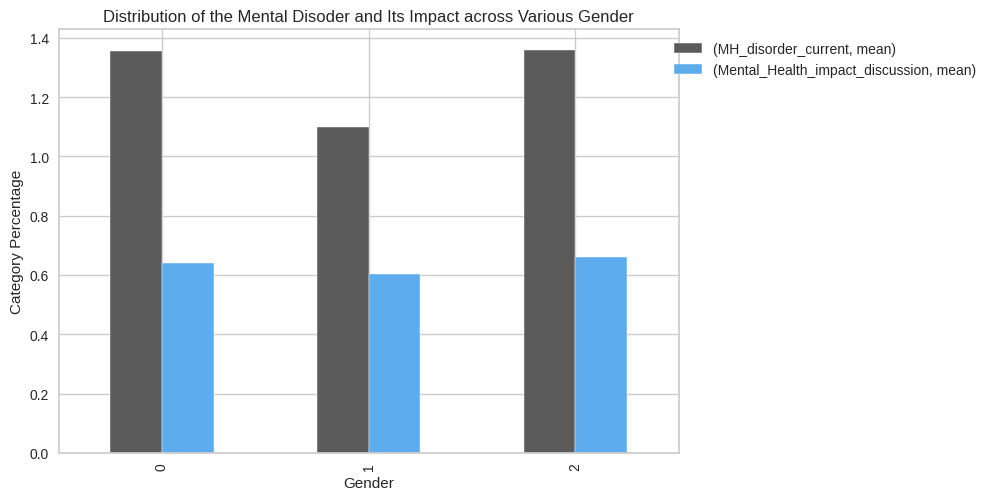

In [16]:
Gender_Analysis = Survey_Data[["Gender", "MH_disorder_current", "Mental_Health_impact_discussion"]].groupby(["Gender"]).agg(["sum", "count", "mean"])

Gender_Analysis[[('MH_disorder_current', 'mean'),('Mental_Health_impact_discussion', 'mean')]].plot.bar(title="Distribution of the Mental Disoder and Its Impact across Various Gender", color=["#5B5B5B", "#5CACEE"])
plt.ylabel("Category Percentage")
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.5, 1), bbox_transform=ax.transAxes)

plt.show()

From the above analysis:


*   0: Represents the other gender
*   1: Represents the Female Gender
*   2: Represents the Male Gender

There is a high mental disorder among the other gender and the male. Based on that they are the highest number of people who ought to discuss a lot when it comes to Mental Disoder with their employers.




Box Plot Analysis of the Age and Gender of the Respondents

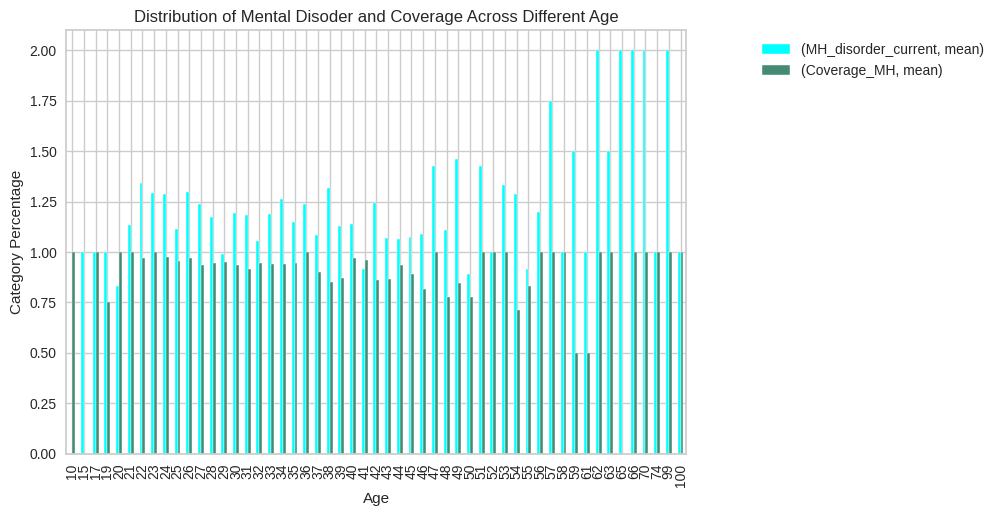

In [17]:
Age_Analysis = Survey_Data[["Age", "MH_disorder_current", "Coverage_MH"]].groupby(["Age"]).agg(["sum", "count", "mean"])

Age_Analysis[[('MH_disorder_current', 'mean'),('Coverage_MH', 'mean')]].plot.bar(title="Distribution of Mental Disoder and Coverage Across Different Age", color=["#00FFFF", "#458B74"])
plt.ylabel("Category Percentage")
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.5, 1), bbox_transform=ax.transAxes)

plt.show()

Under this section we can see the age analysis against the Mental disroders and who is likely to take a Mental Health Coverage. From the analysis across all the participants most people dont take a Mental Health Coverage.






Mental Disoder analysis Per Contry

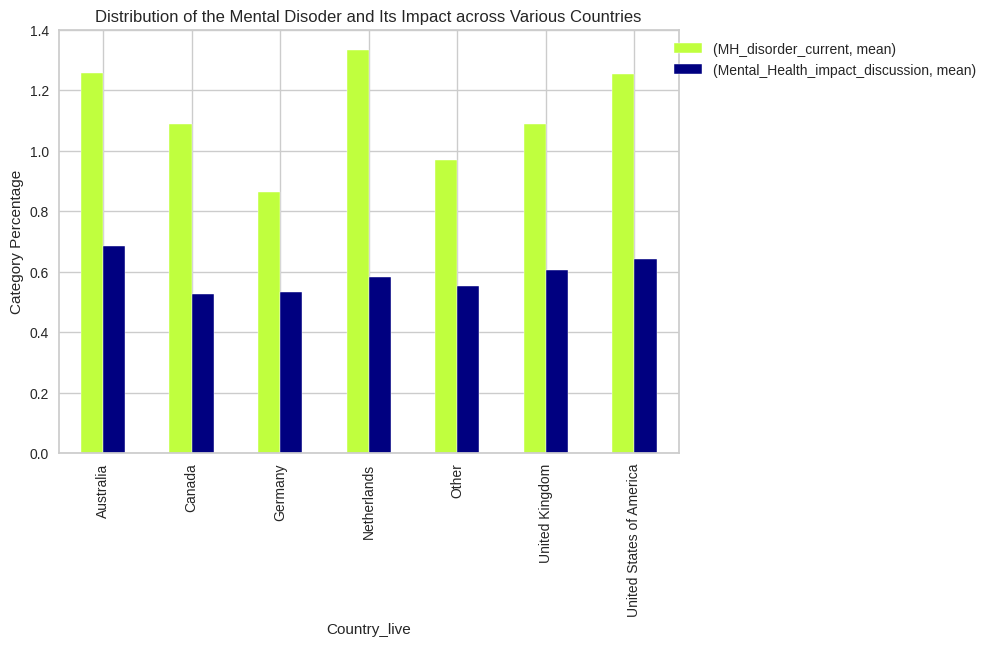

In [18]:
Country_Analysis = Survey_Data[["Country_live", "MH_disorder_current", "Mental_Health_impact_discussion"]].groupby(["Country_live"]).agg(["sum", "count", "mean"])

Country_Analysis[[('MH_disorder_current', 'mean'),('Mental_Health_impact_discussion', 'mean')]].plot.bar(title="Distribution of the Mental Disoder and Its Impact across Various Countries", color=["#C0FF3E", "#000080"])
plt.ylabel("Category Percentage")
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.5, 1), bbox_transform=ax.transAxes)

plt.show()

We reduced our analysis to six countries to create an ease in handling our data. Among the countries, its clearly evident that the Netherhands was the one leading with the Mental Disoder Cases. Followed by USA, Australia and Canada.

Correlation Analysis

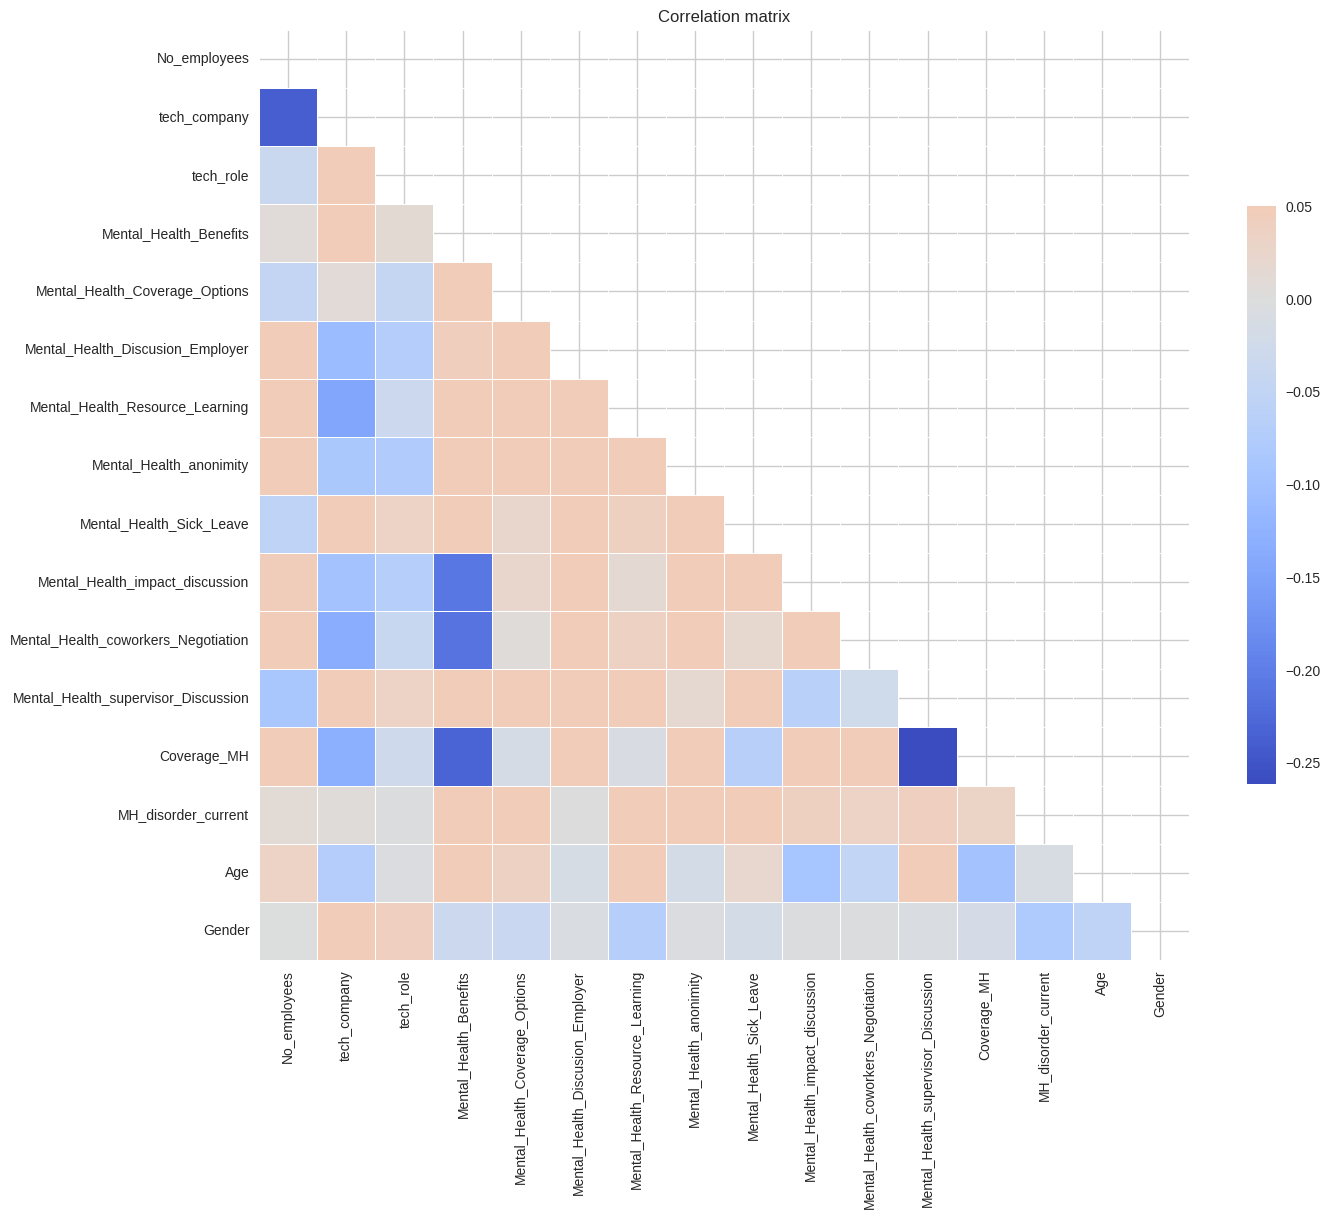

In [19]:
corr = Survey_Data.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 5, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=0.05, center=0, square=True, linewidths=0.4, cbar_kws={"shrink": 0.5}, ax=ax)
plt.title('Correlation matrix')
plt.show()

From the Correlation Matrix we are going to make a comparison of  the coefficients of correlation between different features (or attributes) in a dataset. It allows us to visualize how much (or how little) correlation exists between different variables.

The Distribution Plots.

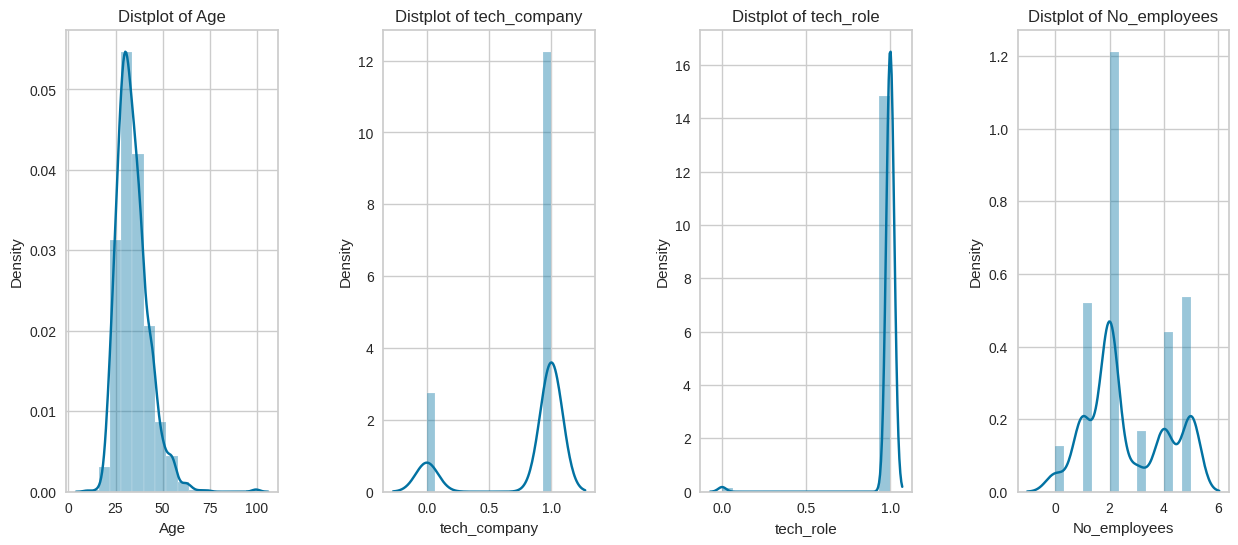

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
variables = ['Age', 'tech_company', 'tech_role', 'No_employees']

for ax, var in zip(axes, variables):
    sns.distplot(Survey_Data[var], bins=15, ax=ax)
    ax.set_title(f'Distplot of {var}')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

Distribution plots provides a data visualization that can be used to display the distribution of a single variable. They can be used to get a quick understanding of the shape of the distribution, the central tendency, the dispersion, and the outliers of the data.

Our distribution plot typically consists of two parts: a histogram and a density plot. The histogram shows the number of observations in each bin of the distribution, and the density plot shows the probability density function of the distribution.

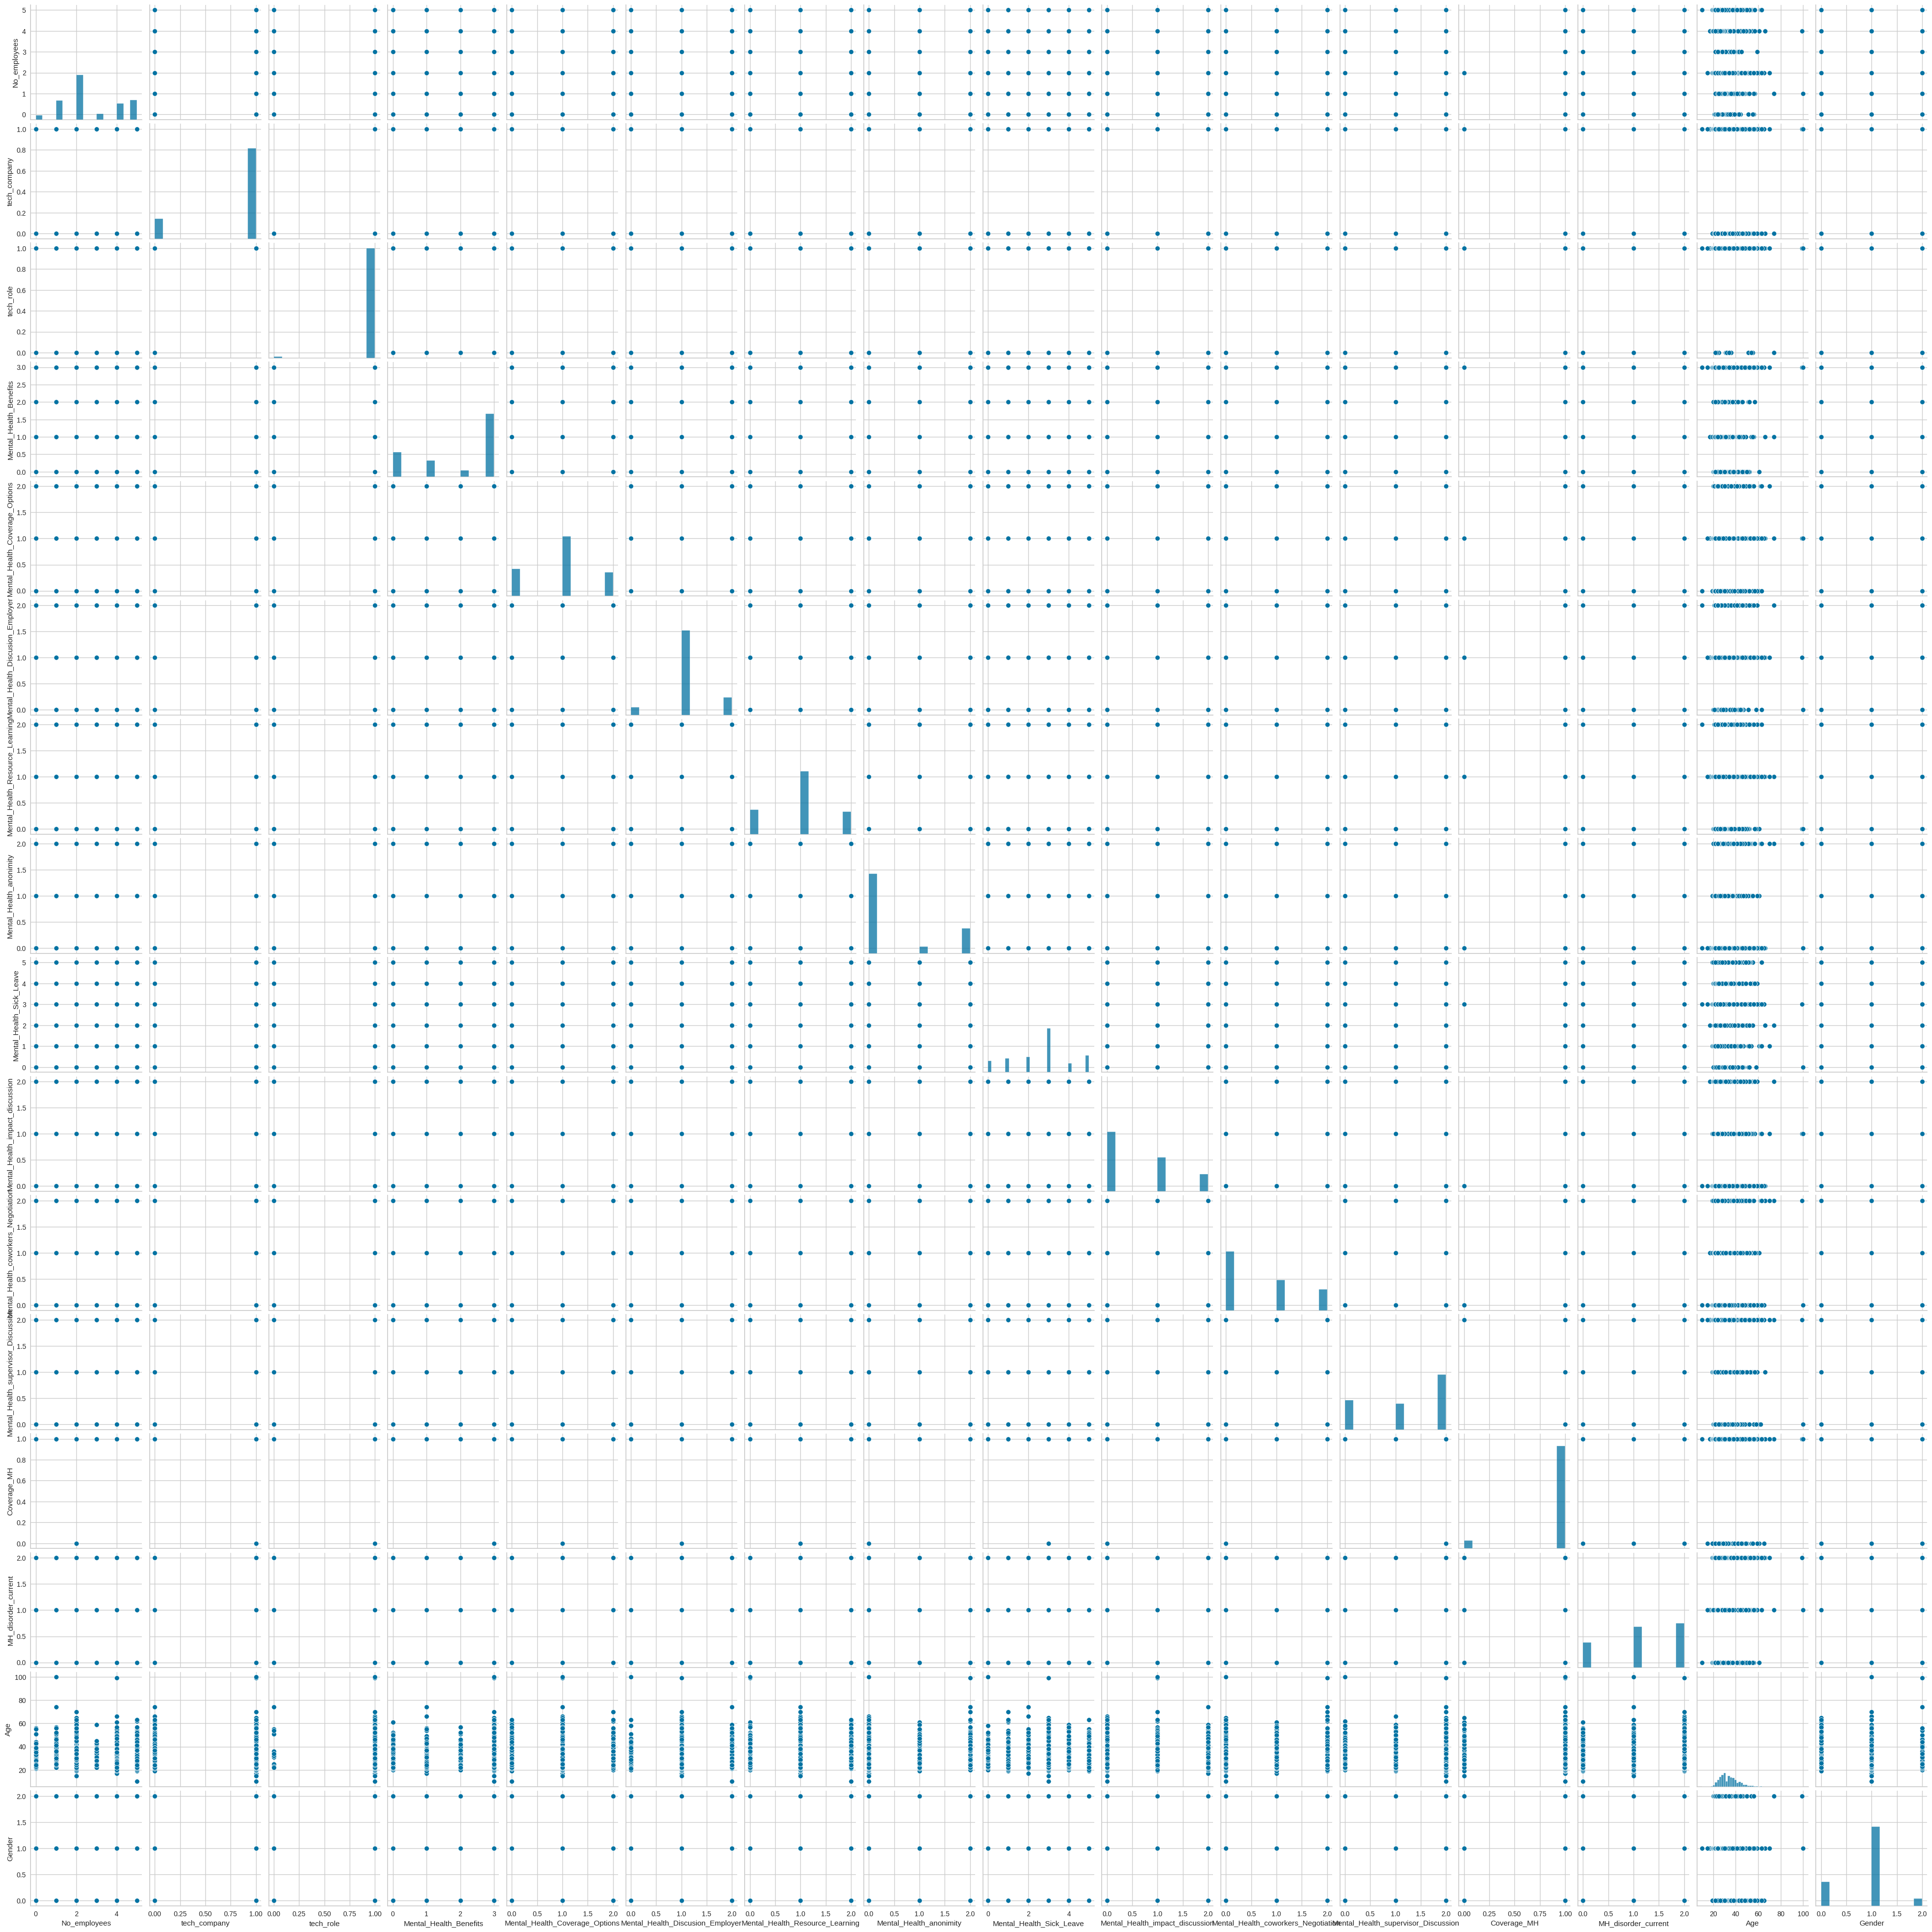

In [21]:
sns.pairplot(Survey_Data)

The above plot creates a grid of plots that show the pairwise relationships between all of the numeric variables in a dataset. The diagonal plots show the distribution of each variable, and the off-diagonal plots show the relationship between each pair of variables. The Variable that we are comparing is the against each other.

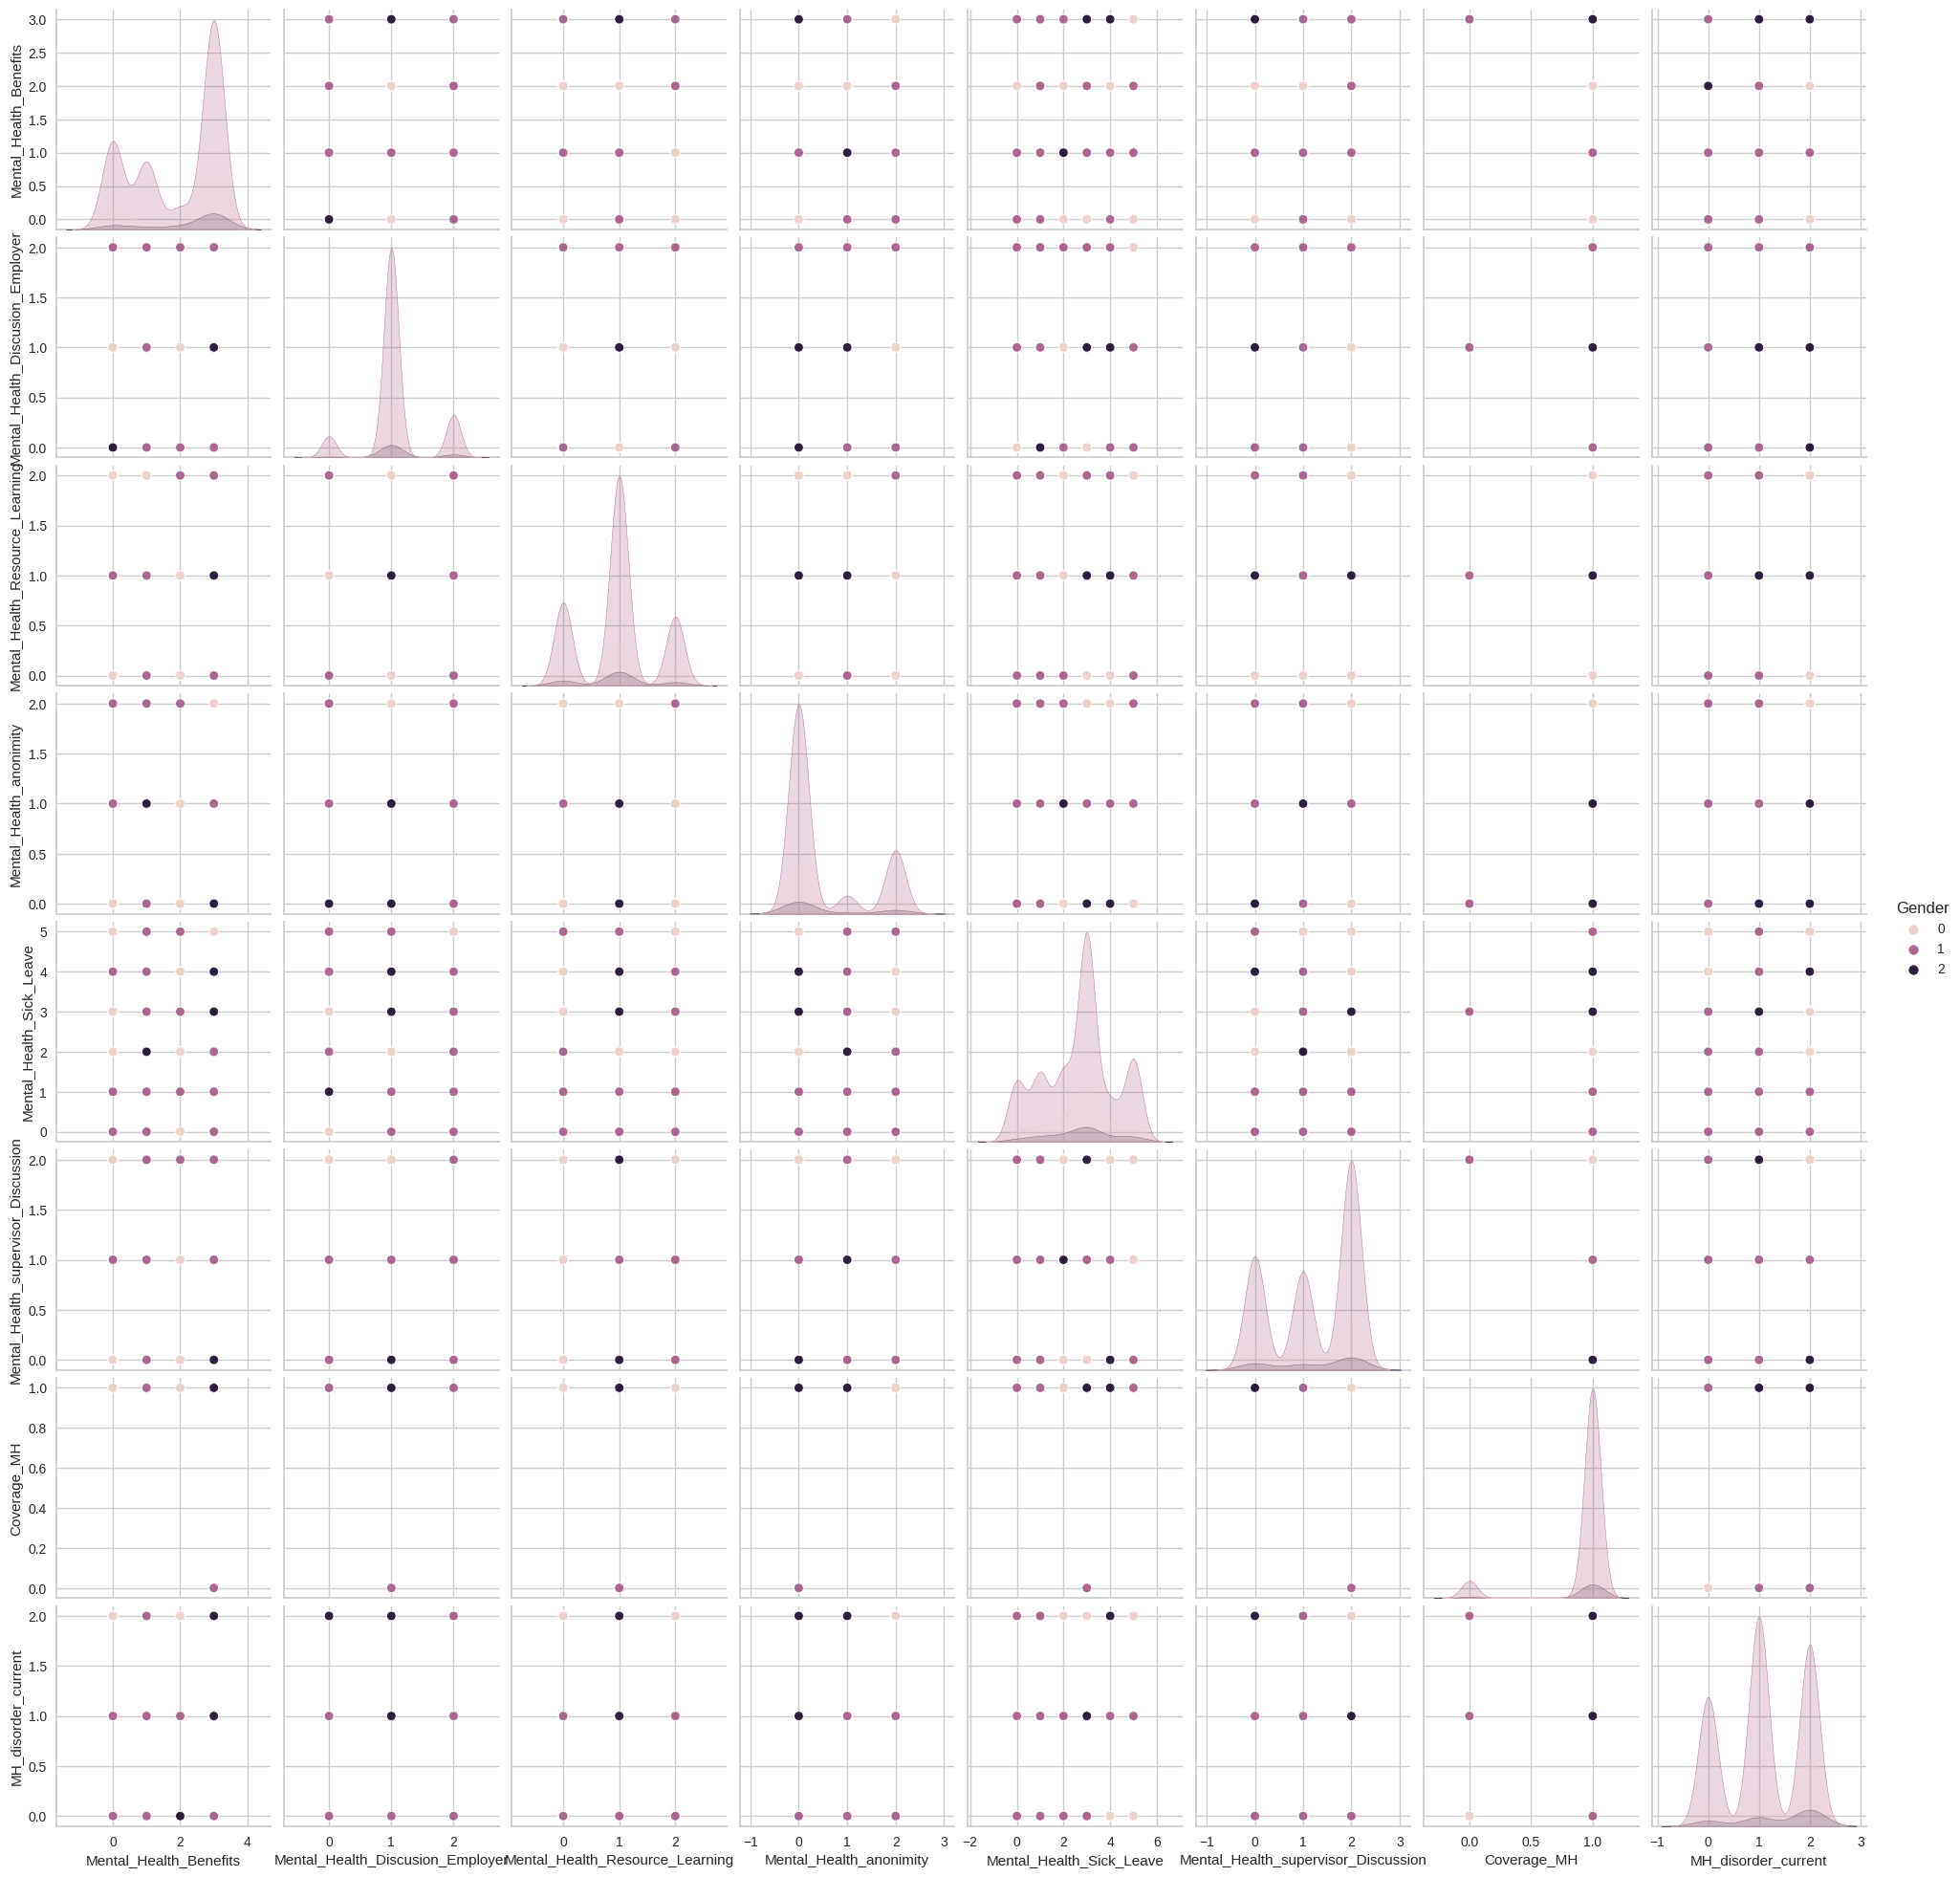

In [22]:
sns.pairplot(Survey_Data, vars = ['Mental_Health_Benefits', 'Mental_Health_Discusion_Employer', 'Mental_Health_Resource_Learning',
    'Mental_Health_anonimity', 'Mental_Health_Sick_Leave', 'Mental_Health_supervisor_Discussion',
    'Coverage_MH', 'MH_disorder_current'], hue = "Gender")

The pairplot will create a grid of plots, with each row corresponding to a different variable. The diagonal plots will show the distribution of each variable, and the off-diagonal plots will show the relationship between each pair of variables.

The Mental_Health_Benefits variable indicates whether or not the respondent's employer offers mental health benefits. The Mental_Health_Discussion_Employer variable indicates whether or not the respondent feels comfortable discussing mental health with their employer. The Mental_Health_Resource_Learning variable indicates whether or not the respondent has access to mental health resources and learning opportunities through their employer. The Mental_Health_anonimity variable indicates whether or not the respondent feels comfortable seeking mental health treatment anonymously. The Mental_Health_Sick_Leave variable indicates whether or not the respondent's employer offers paid sick leave for mental health reasons. The Mental_Health_supervisor_Discussion variable indicates whether or not the respondent has discussed their mental health with their supervisor. The Coverage_MH variable indicates whether or not the respondent has health insurance that covers mental health care. The MH_disorder_current variable indicates whether or not the respondent has a mental health disorder.

The pairplot will show the relationships between these variables for both men and women. It can be used to identify any interesting patterns or trends. For example, the pairplot might show that women are more likely than men to have mental health benefits through their employer. It might also show that women are more likely than men to feel comfortable discussing mental health with their employer.

The pairplot can be a useful tool for exploring the relationships between mental health and workplace factors. It can be used to identify potential predictors for mental health disorders, or to identify workplace factors that can be improved to support mental health.

# **EVALUATION AND DEVELOPMENT OF KMeans Classifier**

## **Determining the Number of Clusters using the K-Elbow Technique**

To find the optimal number of clusters, we will use the elbow method. In this method, we will calculate the inertia for a range of cluster numbers, from 2 to 14. The inertia is a measure of how well the data points are clustered together. We will choose the number of clusters where the inertia curve has an elbow, which indicates that the additional clusters are not providing much improvement in the clustering. The elbow method is a heuristic method for determining the optimal number of clusters in a dataset. The method works by calculating the inertia for a range of cluster numbers. The inertia is a measure of how well the data points are clustered together. The elbow method chooses the number of clusters where the inertia curve has an elbow.
The elbow indicates that the additional clusters are not providing much improvement in the clustering.

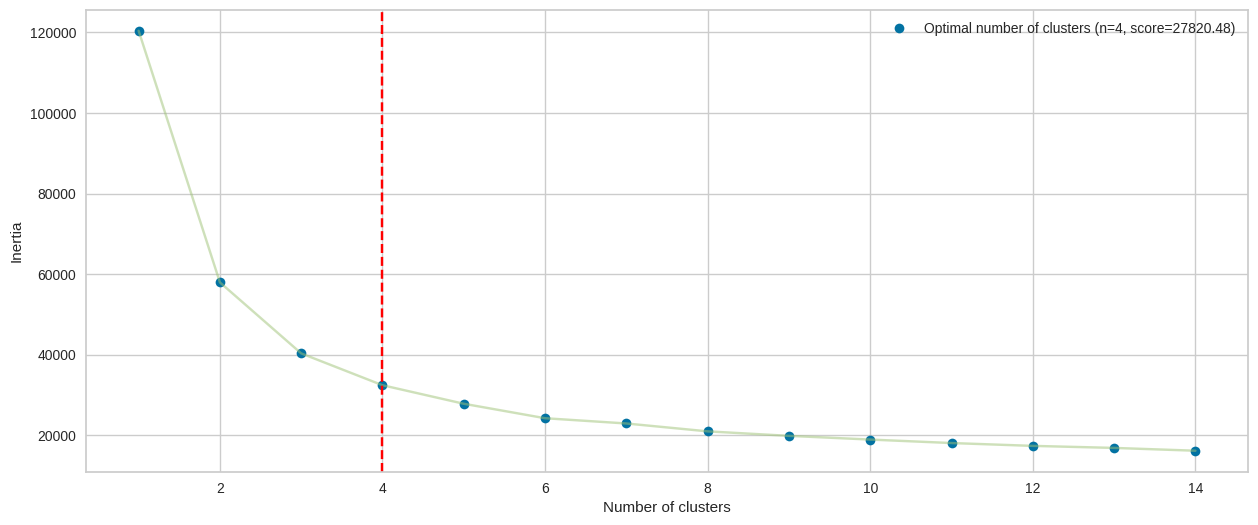

In [23]:
X1 =Survey_Data[["Age", "Mental_Health_Benefits", "tech_company", "tech_role", 'Mental_Health_Benefits', 'No_employees', 'Mental_Health_Coverage_Options',
    'Mental_Health_Discusion_Employer', 'Mental_Health_Resource_Learning',
    'Mental_Health_anonimity', 'Mental_Health_Sick_Leave', 'Mental_Health_impact_discussion',
    'Mental_Health_coworkers_Negotiation', 'Mental_Health_supervisor_Discussion',
    'Coverage_MH', 'MH_disorder_current']].values

inertia = []
for n in range(1, 15):
    model = KMeans(n_clusters=n, init="k-means++", n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm="elkan")
    model.fit(X1)
    inertia.append(model.inertia_)

plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 15), inertia, "o")
plt.plot(np.arange(1, 15), inertia, "-", alpha=0.5)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.axvline(x=4, color="red", linestyle="--")
plt.legend([("Optimal number of clusters (n={0}, score={1:.2f})".format(4, inertia[4]))], loc="best")
plt.show()

From the above analysis we are dealing with 14 Clusters. The optimum cluster point is 4 with a score of 27256

Clustering of the Data.

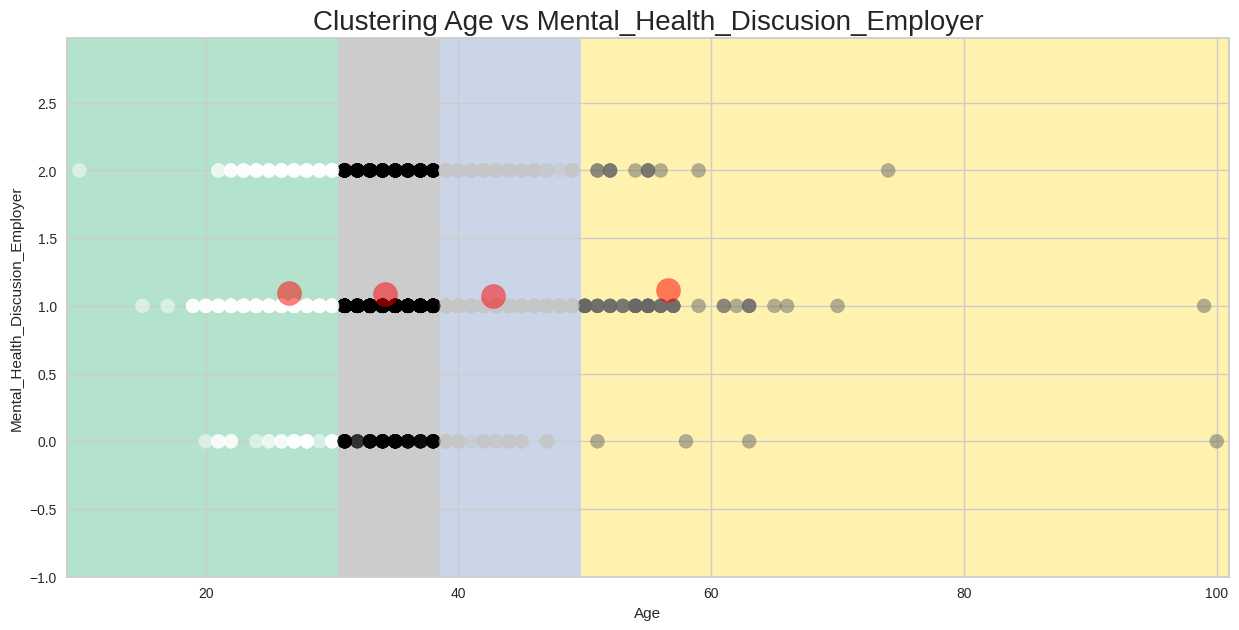

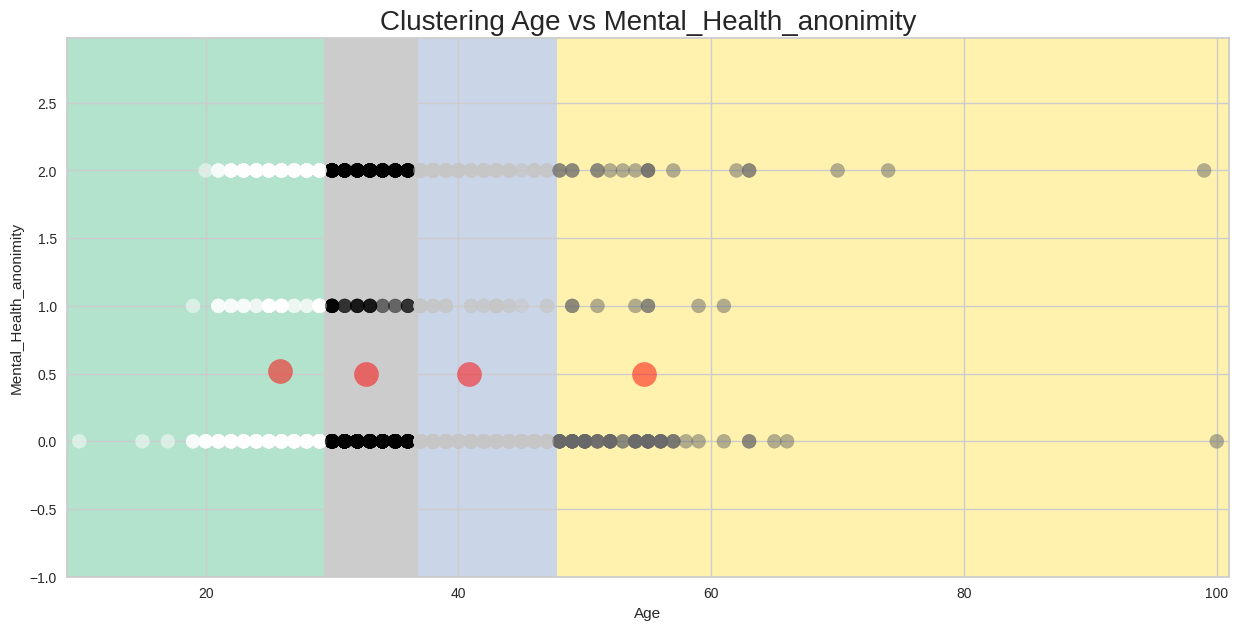

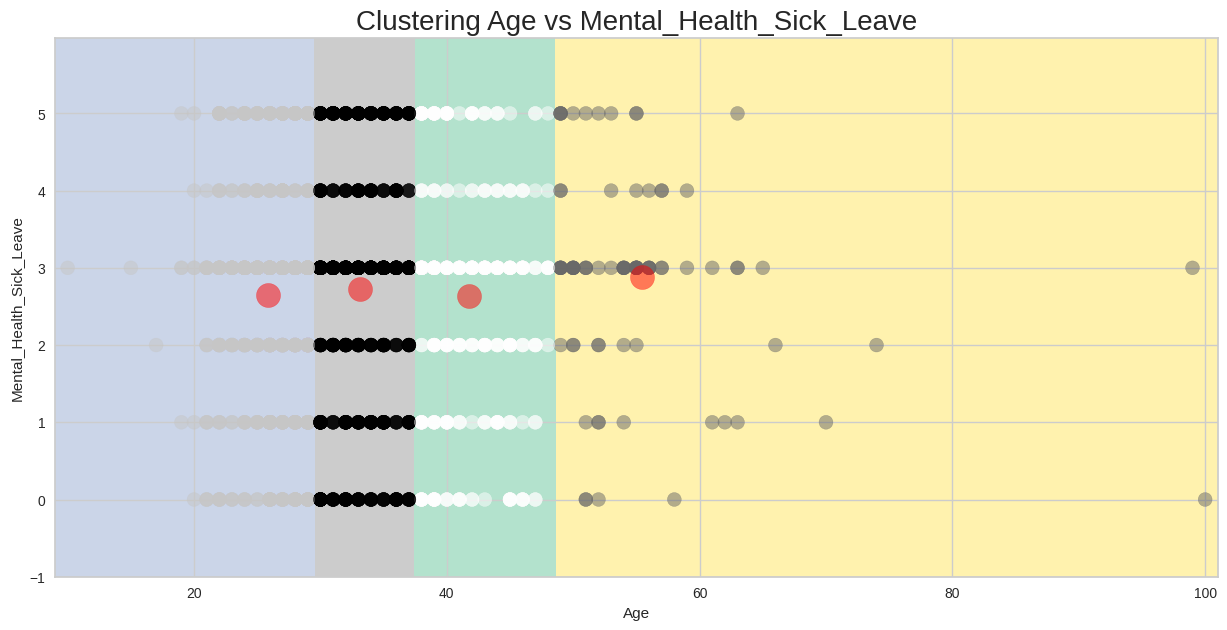

In [24]:


def plot_clusters(x_col, y_col, title):
    X = Survey_Data[[x_col, y_col]].values

    model = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm="elkan")
    model.fit(X)
    labels = model.labels_
    centroids = model.cluster_centers_

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(15, 7))
    plt.clf()
    Z = Z.reshape(xx.shape)
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

    plt.scatter(x=Survey_Data[x_col], y=Survey_Data[y_col], c=labels, s=100, alpha=0.5)
    plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=300, c='red', alpha=0.5)
    plt.ylabel(y_col)
    plt.xlabel(x_col)
    plt.title(f'Clustering {x_col} vs {y_col}', fontsize=20)
    plt.show()

columns_to_plot = [
    ("Age", "Mental_Health_Discusion_Employer", "Mental Health Discusion Employer"),
    ("Age", "Mental_Health_anonimity", "Mental_Health_anonimity"),
    ("Age", "Mental_Health_Sick_Leave", "Mental_Health_Sick_Leave")
]

for x_col, y_col, title in columns_to_plot:
    plot_clusters(x_col, y_col, title)


The plots can be used to gain insights into the relationship between mental health and workplace factors. From the plots we can see that younger respondents may be more likely to have positive experiences with mental health at work. This could be due to a number of factors, such as the fact that younger respondents are more likely to work for companies that offer mental health benefits and resources.

The plots also indicate areas where workplace policies and practices could be improved to support mental health. For example, the plots suggest that employers could make it easier for employees to discuss their mental health with their supervisor. Employers could also provide more resources and support for employees who are seeking mental health treatment.

The Scatter plot of the Age and Mental_Health_Benefits variables in the Survey_Data dataset.

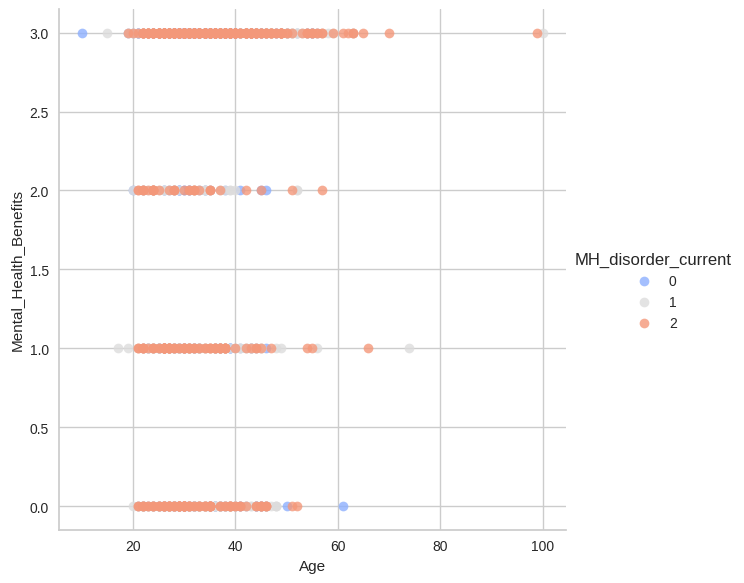

In [25]:
sns.lmplot(x='Age', y='Mental_Health_Benefits', data=Survey_Data, hue='MH_disorder_current',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)

 The above Diagram is a Scatter plot of the Age and Mental_Health_Benefits variables in the Survey_Data dataset. The hue parameter is used to color the points in the plot by the MH_disorder_current variable. The palette='coolwarm' parameter is used to set the color palette for the different subsets of the data. The height=6 and aspect=1 parameters are used to set the height and aspect ratio of the plot. The fit_reg=False parameter is used to prevent a regression line from being fit to the data.

The scatter plot shows that there is a positive correlation between Age and Mental_Health_Benefits. This means that older respondents are more likely to have mental health benefits through their employer. The plot also shows that there is a difference in the distribution of mental health benefits between respondents with and without a mental health disorder. Respondents with a mental health disorder are less likely to have mental health benefits through their employer.

Scatter plot of the Age and Mental_Health_Benefits variables in the Survey_Data dataset.

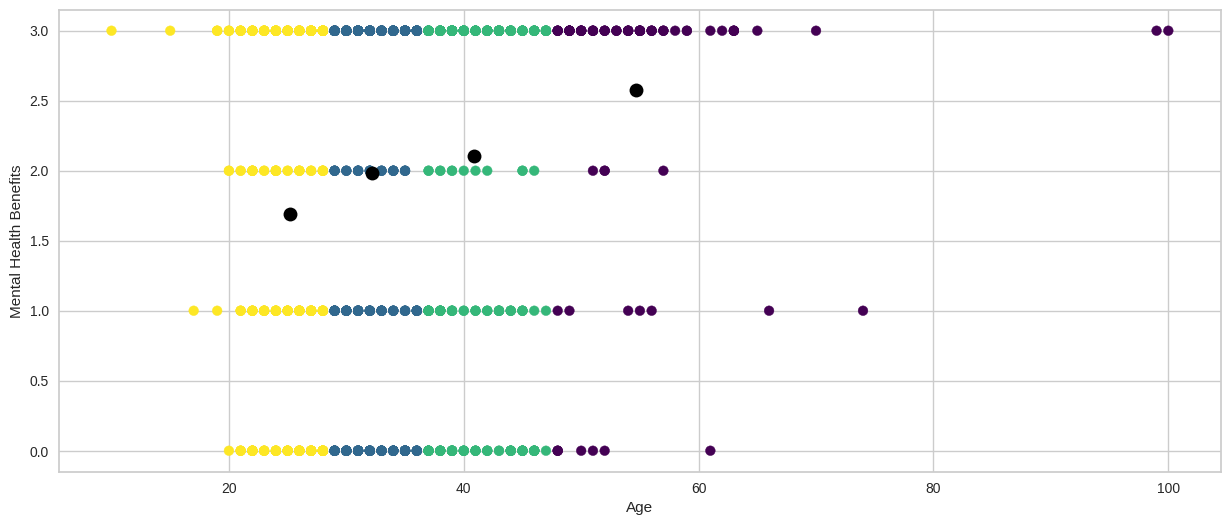

In [26]:
X1 = Survey_Data[["Age", "Mental_Health_Benefits"]].values

model = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm="elkan")
model.fit(X1)
labels1 = model.labels_
centroids1 = model.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(15, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=labels1, cmap="viridis")
plt.plot(centroids1[:, 0], centroids1[:, 1], "o", c="black", markersize=10)
plt.xlabel("Age")
plt.ylabel("Mental Health Benefits")
plt.show()





The above plot is a scatter plot of the Age and Mental_Health_Benefits variables in the Survey_Data dataset. The data is then clustered into 4 groups using the KMeans algorithm. The centroids of the clusters are also plotted as black circles.

The scatter plot shows that there are four distinct clusters of data points. The first cluster is made up of respondents who are young and have no mental health benefits. The second cluster is made up of respondents who are young and have mental health benefits. The third cluster is made up of respondents who are old and have no mental health benefits. The fourth cluster is made up of respondents who are old and have mental health benefits.

The centroids of the clusters are also informative. The centroid of the first cluster is located in the lower left corner of the plot, which indicates that these respondents are young and have no mental health benefits. The centroid of the second cluster is located in the upper left corner of the plot, which indicates that these respondents are young and have mental health benefits. The centroid of the third cluster is located in the lower right corner of the plot, which indicates that these respondents are old and have no mental health benefits. The centroid of the fourth cluster is located in the upper right corner of the plot, which indicates that these respondents are old and have mental health benefits.

The scatter plot and the cluster centroids can be used to gain insights into the relationship between age, mental health benefits, and clustering. For example, the plot suggests that there are two distinct groups of respondents: those who are young and have no mental health benefits, and those who are old and have mental health benefits. The plot also suggests that employers could do more to provide mental health benefits to employees who are young and have no mental health benefits.




.

The Heatmap of the clustered data points

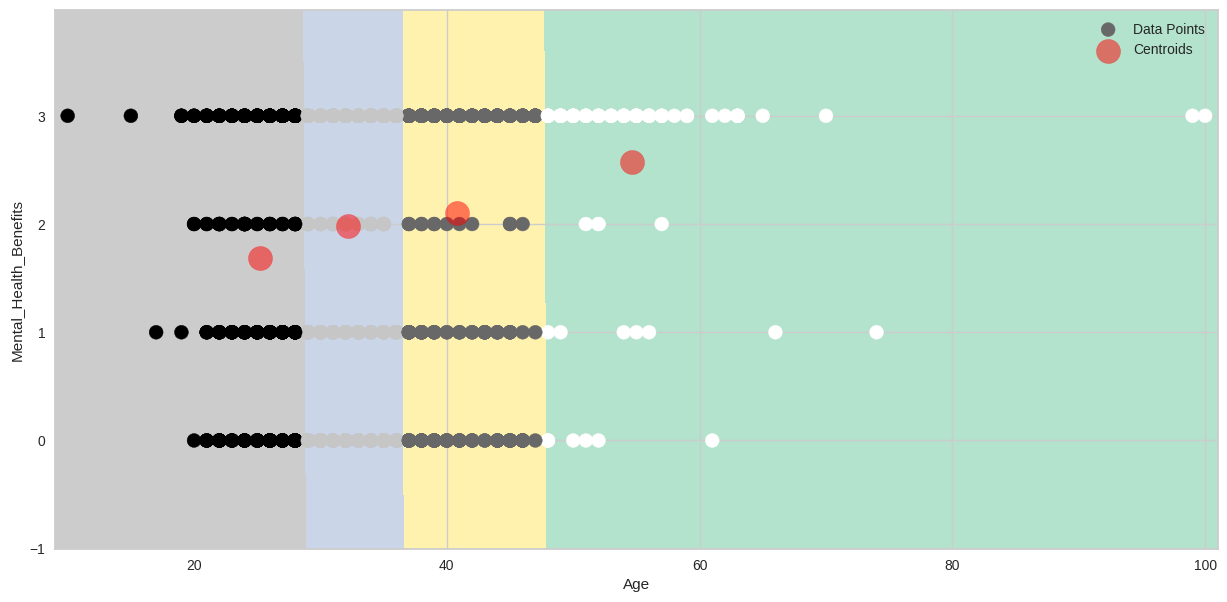

In [27]:
plt.figure(figsize=(15, 7))

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

scatter1 = plt.scatter(x=Survey_Data['Age'], y=Survey_Data['Mental_Health_Benefits'], c=labels1, s=100)
scatter2 = plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.ylabel('Mental_Health_Benefits')
plt.xlabel('Age')

plt.legend([scatter1, scatter2], ['Data Points', 'Centroids'])

plt.show()

The heatmap of the clustered data points, with the centroids of the clusters plotted as red circles. The heatmap shows the distribution of the data points in the Age and Mental_Health_Benefits variables, with each color representing a different cluster. The centroids of the clusters are also plotted as red circles, which helps to visualize the clusters.

The heatmap shows that the data points are not perfectly clustered, but there are some clear trends. For example, the data points in the first cluster are mostly young and have no mental health benefits. The data points in the second cluster are mostly young and have mental health benefits. The data points in the third cluster are mostly old and have no mental health benefits. The data points in the fourth cluster are mostly old and have mental health benefits.

Calculating the Accuracy of the Model

In [28]:
model = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm="elkan")
model.fit(X1)
labels1 = model.predict(X1)
centroids1 = model.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])


correct_labels = sum(labels1 == Survey_Data["Gender"])
accuracy_score = correct_labels / float(Survey_Data.shape[0])
print("Accuracy score: {0:0.2f}". format(accuracy_score))

Accuracy score: 0.56


# KMeans Clustering in 3D

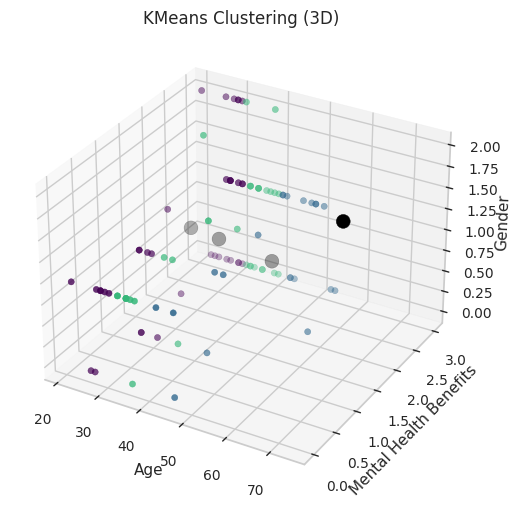

In [ ]:
X1 = Survey_Data[["Age", "Mental_Health_Benefits", "Gender"]].values

sample_idx = np.random.randint(0, len(X1), 100)
X1_sample = X1[sample_idx]

model = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm="elkan")
model.fit(X1_sample)
labels1 = model.labels_
centroids1 = model.cluster_centers_

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

h = 0.02
x_min, x_max = X1_sample[:, 0].min() - 1, X1_sample[:, 0].max() + 1
y_min, y_max = X1_sample[:, 1].min() - 1, X1_sample[:, 1].max() + 1
z_min, z_max = X1_sample[:, 2].min() - 1, X1_sample[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), np.arange(z_min, z_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])

ax.scatter(X1_sample[:, 0], X1_sample[:, 1], X1_sample[:, 2], c=labels1, cmap="viridis")
ax.scatter(centroids1[:, 0], centroids1[:, 1], centroids1[:, 2], c="black", marker="o", s=100)
ax.set_xlabel("Age")
ax.set_ylabel("Mental Health Benefits")
ax.set_zlabel("Gender")
plt.title("KMeans Clustering (3D)")
plt.show()


# **Conclusion**
The growth of the Mental related disorders has been on a high alert among the tech related workforce in the world. From the analysis we can note that US leads in terms of mental disorders. We have also noted that the big companies are investing a lot when it comes to handling Mental Disorders.  Therefore, in our case we are going to have a look at the analysis of mental related disorders. As a company data-scientist expert we are going to have a look at the correlation and the impact of health-related disorders among the work force. We are going to create a correlation between the tech-related workforce with the other workforce in the workplace. From the analysis we can also conclude that Most of the employer doesn’t have money to offer the mental health coverage to all his employees. They can therefore concentrate on the efforts offering mental health. This can be ideal for mental disease which makes it more efficient for the mental health program.